<a href="https://colab.research.google.com/github/adil-ak/Deep_Learning_Projects/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.value_counts('Exited')

,count
Exited,
0,7963
1,2037


In [7]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.2 MB/s eta 0:00:00


In [9]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


#Encoding

In [10]:
import category_encoders as ce
from category_encoders import OneHotEncoder

In [11]:
df1=pd.get_dummies(df,columns=['Geography','Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [12]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


#Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

In [15]:
cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df1[cols]=Scaler.fit_transform(df1[cols])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


#Train Test Split

In [16]:
x=df1.drop('Exited',axis=1)
y=df1['Exited']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Model Creation

In [18]:
df1.shape

(10000, 14)

In [30]:
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(13,input_shape=(13,),activation='relu'),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])



In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6675 - loss: 0.6022
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4747
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4575
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4352
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4431
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4234
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4226
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.4063
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.4036
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8349 - loss: 0.3941
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3771
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [33]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3488


[0.34969383478164673, 0.8575000166893005]

In [37]:
y_pred=model.predict(x_test)
print(y_pred[:10])
print(y_test[:10])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.05875157]
 [0.02421504]
 [0.16626738]
 [0.04765857]
 [0.07396422]
 [0.00674994]
 [0.26461834]
 [0.19099058]
 [0.48582622]
 [0.6957058 ]]
6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64


In [38]:
y_predictions=[1 if i>0.5 else 0 for i in y_pred]

In [39]:
y_predictions[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [47]:
import tensorflow as tf

cm=tf.math.confusion_matrix(y_test,y_predictions)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1513,   94],
       [ 191,  202]], dtype=int32)>

Text(50.722222222222214, 0.5, 'Actual')

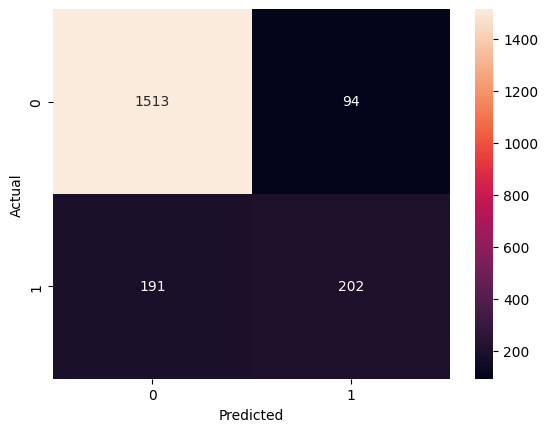

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)*100

85.75